In [1]:
print('sss')

sss


In [3]:
## import liberaries 
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 as sql
import matplotlib.pyplot as plt

In [4]:
## Read all the sheets
df= pd.read_excel(r'C:\Users\arvinmvn\Downloads\Quality Dashboard W32 - W34.xlsx',sheet_name = 'US Raw data')
df.head()

,Site,Locale,Workflow,Customer,SO ID,OM,TM,DA,Column 9,Column 10,...,Quality Measured Count,Sample %,ASR vs Gold,ADS vs Gold,Difference,Select ADS vs Gold Overturn,Select ADS vs Gold Token,Select ASR vs Gold Overturn,Select ASR vs Gold Token,Class
0,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,czvij,sivakuan,0-400,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
1,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,czvij,sivakuan,900-1000,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
2,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,0-400,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
3,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,400-700,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
4,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,700-800,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN


In [5]:
df_quality=df.copy()
df_quality.head()

,Site,Locale,Workflow,Customer,SO ID,OM,TM,DA,Column 9,Column 10,...,Quality Measured Count,Sample %,ASR vs Gold,ADS vs Gold,Difference,Select ADS vs Gold Overturn,Select ADS vs Gold Token,Select ASR vs Gold Overturn,Select ASR vs Gold Token,Class
0,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,czvij,sivakuan,0-400,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
1,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,czvij,sivakuan,900-1000,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
2,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,0-400,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
3,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,400-700,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
4,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,700-800,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN


In [6]:
## Rename parameters

df_SQL = df_quality.rename(columns = {'Site': 'SITE',
                          'Locale': 'LOCALE',
                           'Customer' :'CUST',
                            'Workflow' :'Work',
                             'SO ID':'SOID',
                              'OM':'OM',
                              'TM':'TM',
                          'DA': 'DA',
                           'Column 9': 'Column9','Column 10': 'Column10',
                          'Column 11': 'Column11',
                          'Column 12': 'Column12',
                          'COMPLEXITY': 'COMPLEXITY',
                           'Select Date Part': 'WEEK',
                         'Processed Count': 'ProcessedCount',
                          'Quality Measured Count': 'QualityMeasuredCount',
                          'Sample %': 'Sample%',
                           'ASR vs Gold': 'ASRvsGold',
                          'ADS vs Gold': 'ADSvsGold',
                          'Difference': 'Difference',
                          'Select ADS vs Gold Overturn': 'ADSvsGoldOverturn',
                          'Select ADS vs Gold Token': 'ADSvsGoldToken',
                          'Select ASR vs Gold Overturn': 'ASRvsGoldOverturn',
                          'Select ASR vs Gold Token': 'ASRvsGoldToken',}, inplace = False)
df_SQL.head()

,SITE,LOCALE,Work,CUST,SOID,OM,TM,DA,Column9,Column10,...,QualityMeasuredCount,Sample%,ASRvsGold,ADSvsGold,Difference,ADSvsGoldOverturn,ADSvsGoldToken,ASRvsGoldOverturn,ASRvsGoldToken,Class
0,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,czvij,sivakuan,0-400,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
1,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,czvij,sivakuan,900-1000,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
2,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,0-400,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
3,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,400-700,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
4,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,700-800,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN


In [7]:
from pathlib import Path
Path('ads_tm_qualitysummary.db').touch()

In [8]:
## connect to local

conn = sql.connect('ads_tm_qualitysummary.db')
c = conn.cursor()

In [9]:
## Read SQL Data frame

df_SQL.to_sql('ads_qualitysummary_tm_table', conn, if_exists='append', index=False)
df_SQL.head()

C:\Users\arvinmvn\Anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


,SITE,LOCALE,Work,CUST,SOID,OM,TM,DA,Column9,Column10,...,QualityMeasuredCount,Sample%,ASRvsGold,ADSvsGold,Difference,ADSvsGoldOverturn,ADSvsGoldToken,ASRvsGoldOverturn,ASRvsGoldToken,Class
0,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,czvij,sivakuan,0-400,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
1,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,czvij,sivakuan,900-1000,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
2,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,0-400,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
3,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,400-700,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN
4,MAA,EN_US,GSR SESSION TRANSCRIPTION,ALEXA AUTOMOTIVE,SO-21797,rbbashee,danijos,nikitpn,700-800,NaT,...,0,0.0,NaN,NaN,NaN,0,NaN,0,NaN,NaN


In [10]:
##RAW Data Query for quality report

sql='''
select tm,da,week,cust,
round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) as ADS_Quality,
round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) as ASR_Quality,
round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) as Variance
from ads_qualitysummary_tm_table
group by week,tm,da,cust
order by week asc



''';

    
df_sql = pd.read_sql_query(sql,conn)
df_sql.head(5)

,TM,DA,WEEK,CUST,ADS_Quality,ASR_Quality,Variance
0,czvij,baravnd,2021 Week 31,ALEXA ENTERTAINMENT,NaN,NaN,NaN
1,czvij,baravnd,2021 Week 31,ALEXA FOR BUSINESS,NaN,NaN,NaN
2,czvij,baravnd,2021 Week 31,ALEXA HYBRID,100.0,100.0,0.0
3,czvij,baravnd,2021 Week 31,AMAZON MUSIC,NaN,NaN,NaN
4,czvij,baravnd,2021 Week 31,ASK,100.0,100.0,0.0


In [11]:
##Week Variables
w1='32'
w2='33'
w3='34'

In [12]:
## Table 0 Week vs QUality


##RAW Data Query for quality report

sql=f"""
select subtable.om as OM,

max(W{w1}_ADS_Quality) as Week_{w1}_ADS_Quality,
max(W{w1}_ASR_Quality) as Week_{w1}_ASR_Quality,
case when
min(W{w1}_Variance) < 0 then min(W{w1}_Variance) else max(W{w1}_Variance) end as Week_{w1}_Variance,


max(W{w2}_ADS_Quality) as Week_{w2}_ADS_Quality,
max(W{w2}_ASR_Quality) as Week_{w2}_ASR_Quality,
case when 
min(W{w2}_Variance) < 0 then min(W{w2}_Variance) else max(W{w2}_Variance) end as Week_{w2}_Variance,

max(W{w3}_ADS_Quality) as Week_{w3}_ADS_Quality,
max(W{w3}_ASR_Quality) as Week_{w3}_ASR_Quality,
case when 
min(W{w3}_Variance) < 0 then min(W{w3}_Variance) else max(W{w3}_Variance) end as Week_{w3}_Variance

from (
select om,
CASE WHEN
Week = '2021 Week {w3}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w3}_ADS_quality,
CASE WHEN
Week = '2021 Week {w3}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w3}_ASR_quality,
CASE WHEN
Week = '2021 Week {w3}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w3}_Variance,

CASE WHEN
Week = '2021 Week {w2}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w2}_ADS_quality,
CASE WHEN
Week = '2021 Week {w2}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w2}_ASR_quality,
CASE WHEN
Week = '2021 Week {w2}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w2}_Variance,

CASE WHEN
Week = '2021 Week {w1}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w1}_ADS_quality,
CASE WHEN
Week = '2021 Week {w1}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w1}_ASR_quality,
CASE WHEN
Week = '2021 Week {w1}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w1}_Variance
from ads_qualitysummary_tm_table
where om = 'rbbashee'
group by week
) subtable


""";

    
df_om_quality_sql = pd.read_sql_query(sql,conn)
df_om_quality_sql.head()

,OM,Week_32_ADS_Quality,Week_32_ASR_Quality,Week_32_Variance,Week_33_ADS_Quality,Week_33_ASR_Quality,Week_33_Variance,Week_34_ADS_Quality,Week_34_ASR_Quality,Week_34_Variance
0,rbbashee,90.78,90.11,67.0,91.99,91.58,41.0,91.91,91.22,69.0


In [13]:
## Table 1 TM vs Week vs QUality


##RAW Data Query for quality report

sql=f"""
select tm,

max(W{w1}_ADS_Quality) as Week_{w1}_ADS_Quality,
max(W{w1}_ASR_Quality) as Week_{w1}_ASR_Quality,
case when
min(W{w1}_Variance) < 0 then min(W{w1}_Variance) else max(W{w1}_Variance) end as Week_{w1}_Variance,


max(W{w2}_ADS_Quality) as Week_{w2}_ADS_Quality,
max(W{w2}_ASR_Quality) as Week_{w2}_ASR_Quality,
case when 
min(W{w2}_Variance) < 0 then min(W{w2}_Variance) else max(W{w2}_Variance) end as Week_{w2}_Variance,

max(W{w3}_ADS_Quality) as Week_{w3}_ADS_Quality,
max(W{w3}_ASR_Quality) as Week_{w3}_ASR_Quality,
case when 
min(W{w3}_Variance) < 0 then min(W{w3}_Variance) else max(W{w3}_Variance) end as Week_{w3}_Variance

from (
select tm,
CASE WHEN
Week = '2021 Week {w3}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w3}_ADS_quality,
CASE WHEN
Week = '2021 Week {w3}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w3}_ASR_quality,
CASE WHEN
Week = '2021 Week {w3}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w3}_Variance,

CASE WHEN
Week = '2021 Week {w2}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w2}_ADS_quality,
CASE WHEN
Week = '2021 Week {w2}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w2}_ASR_quality,
CASE WHEN
Week = '2021 Week {w2}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w2}_Variance,

CASE WHEN
Week = '2021 Week {w1}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w1}_ADS_quality,
CASE WHEN
Week = '2021 Week {w1}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w1}_ASR_quality,
CASE WHEN
Week = '2021 Week {w1}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w1}_Variance
from ads_qualitysummary_tm_table
where om = 'rbbashee'
group by week,tm
) subtable

group by subtable.tm

""";

    
df_tm_quality_sql = pd.read_sql_query(sql,conn)
df_tm_quality_sql.head()

,tm,Week_32_ADS_Quality,Week_32_ASR_Quality,Week_32_Variance,Week_33_ADS_Quality,Week_33_ASR_Quality,Week_33_Variance,Week_34_ADS_Quality,Week_34_ASR_Quality,Week_34_Variance
0,czvij,90.61,90.17,44.0,91.58,92.36,-78.0,91.86,91.26,60.0
1,danijos,91.96,90.57,139.0,91.57,90.77,80.0,91.98,91.16,82.0
2,paramss,89.60,89.55,5.0,92.74,91.75,99.0,91.78,91.33,45.0


In [14]:
## Table 2 customer vs Week vs QUality


##RAW Data Query for quality report

sql=f"""
select subtable.cust as customer,

max(W{w1}_ADS_Quality) as Week_{w1}_ADS_Quality,
max(W{w1}_ASR_Quality) as Week_{w1}_ASR_Quality,
case when
min(W{w1}_Variance) < 0 then min(W{w1}_Variance) else max(W{w1}_Variance) end as Week_{w1}_Variance,


max(W{w2}_ADS_Quality) as Week_{w2}_ADS_Quality,
max(W{w2}_ASR_Quality) as Week_{w2}_ASR_Quality,
case when 
min(W{w2}_Variance) < 0 then min(W{w2}_Variance) else max(W{w2}_Variance) end as Week_{w2}_Variance,

max(W{w3}_ADS_Quality) as Week_{w3}_ADS_Quality,
max(W{w3}_ASR_Quality) as Week_{w3}_ASR_Quality,
case when 
min(W{w3}_Variance) < 0 then min(W{w3}_Variance) else max(W{w3}_Variance) end as Week_{w3}_Variance

from (
select cust,
CASE WHEN
Week = '2021 Week {w3}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w3}_ADS_quality,
CASE WHEN
Week = '2021 Week {w3}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w3}_ASR_quality,
CASE WHEN
Week = '2021 Week {w3}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w3}_Variance,

CASE WHEN
Week = '2021 Week {w2}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w2}_ADS_quality,
CASE WHEN
Week = '2021 Week {w2}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w2}_ASR_quality,
CASE WHEN
Week = '2021 Week {w2}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w2}_Variance,

CASE WHEN
Week = '2021 Week {w1}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w1}_ADS_quality,
CASE WHEN
Week = '2021 Week {w1}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w1}_ASR_quality,
CASE WHEN
Week = '2021 Week {w1}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w1}_Variance
from ads_qualitysummary_tm_table
where om = 'rbbashee'
group by week,cust
) subtable

group by subtable.cust

""";

    
df_cust_quality_sql = pd.read_sql_query(sql,conn)
df_cust_quality_sql.head()

,customer,Week_32_ADS_Quality,Week_32_ASR_Quality,Week_32_Variance,Week_33_ADS_Quality,Week_33_ASR_Quality,Week_33_Variance,Week_34_ADS_Quality,Week_34_ASR_Quality,Week_34_Variance
0,ADS-QUALITY,100.00,100.00,0.0,93.8,94.38,-58.0,94.38,93.98,40.0
1,ALEXA AUTOMOTIVE,100.00,100.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0
2,ALEXA EDUCATION,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0
3,ALEXA ENTERTAINMENT,82.14,57.14,2500.0,100.0,100.00,0.0,95.45,90.91,454.0
4,ALEXA EXPERIENCE AND DEVICES (EAD),40.00,40.00,0.0,0.0,0.00,-10000.0,50.00,0.00,5000.0


In [15]:
## Table 3 TM vs DA Week vs QUality


##RAW Data Query for quality report

sql=f"""
select tm,da,

max(W{w1}_ADS_Quality) as Week_{w1}_ADS_Quality,
max(W{w1}_ASR_Quality) as Week_{w1}_ASR_Quality,
case when
min(W{w1}_Variance) < 0 then min(W{w1}_Variance) else max(W{w1}_Variance) end as Week_{w1}_Variance,


max(W{w2}_ADS_Quality) as Week_{w2}_ADS_Quality,
max(W{w2}_ASR_Quality) as Week_{w2}_ASR_Quality,
case when 
min(W{w2}_Variance) < 0 then min(W{w2}_Variance) else max(W{w2}_Variance) end as Week_{w2}_Variance,

max(W{w3}_ADS_Quality) as Week_{w3}_ADS_Quality,
max(W{w3}_ASR_Quality) as Week_{w3}_ASR_Quality,
case when 
min(W{w3}_Variance) < 0 then min(W{w3}_Variance) else max(W{w3}_Variance) end as Week_{w3}_Variance

from (
select tm,da,
CASE WHEN
Week = '2021 Week {w3}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w3}_ADS_quality,
CASE WHEN
Week = '2021 Week {w3}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w3}_ASR_quality,
CASE WHEN
Week = '2021 Week {w3}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w3}_Variance,

CASE WHEN
Week = '2021 Week {w2}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w2}_ADS_quality,
CASE WHEN
Week = '2021 Week {w2}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w2}_ASR_quality,
CASE WHEN
Week = '2021 Week {w2}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w2}_Variance,

CASE WHEN
Week = '2021 Week {w1}' THEN round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) else 0 end as W{w1}_ADS_quality,
CASE WHEN
Week = '2021 Week {w1}' THEN round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2) else 0 end as W{w1}_ASR_quality,
CASE WHEN
Week = '2021 Week {w1}' THEN 100*(round(100 - sum(ADSvsGoldOverturn)/sum(ADSvsGoldtoken)*100,2) - round(100 - sum(ASRvsGoldOverturn)/sum(ASRvsGoldtoken)*100,2)) else 0 end as W{w1}_Variance
from ads_qualitysummary_tm_table
where om = 'rbbashee'
group by week,tm,da
) subtable

group by subtable.tm,subtable.da
order by subtable.tm,subtable.da
""";

    
df_tm_da_quality_sql = pd.read_sql_query(sql,conn)
df_tm_da_quality_sql.head()

,tm,da,Week_32_ADS_Quality,Week_32_ASR_Quality,Week_32_Variance,Week_33_ADS_Quality,Week_33_ASR_Quality,Week_33_Variance,Week_34_ADS_Quality,Week_34_ASR_Quality,Week_34_Variance
0,czvij,baravnd,88.11,85.71,240.0,92.20,92.77,-57.0,89.70,91.12,-142.0
1,czvij,dhowhk,90.57,90.07,50.0,90.73,92.05,-132.0,90.76,85.87,489.0
2,czvij,girirag,92.57,88.12,445.0,89.75,88.69,106.0,93.57,90.42,315.0
3,czvij,gkrimzn,90.71,90.16,55.0,90.99,93.56,-257.0,92.35,90.77,158.0
4,czvij,goprah,0.00,0.00,0.0,94.11,96.00,-189.0,89.97,89.56,41.0


In [16]:
## Group the derived SQL queries and data processing using python

df_tm_quality_sql.head()
df_cust_quality_sql.head()
df_tm_da_quality_sql.head()

,tm,da,Week_32_ADS_Quality,Week_32_ASR_Quality,Week_32_Variance,Week_33_ADS_Quality,Week_33_ASR_Quality,Week_33_Variance,Week_34_ADS_Quality,Week_34_ASR_Quality,Week_34_Variance
0,czvij,baravnd,88.11,85.71,240.0,92.20,92.77,-57.0,89.70,91.12,-142.0
1,czvij,dhowhk,90.57,90.07,50.0,90.73,92.05,-132.0,90.76,85.87,489.0
2,czvij,girirag,92.57,88.12,445.0,89.75,88.69,106.0,93.57,90.42,315.0
3,czvij,gkrimzn,90.71,90.16,55.0,90.99,93.56,-257.0,92.35,90.77,158.0
4,czvij,goprah,0.00,0.00,0.0,94.11,96.00,-189.0,89.97,89.56,41.0


In [17]:
df_team_paramss_quality_sql =df_tm_da_quality_sql[df_tm_da_quality_sql['tm']=='paramss']
df_team_danijos_quality_sql =df_tm_da_quality_sql[df_tm_da_quality_sql['tm']=='danijos']
df_team_czvij_quality_sql =df_tm_da_quality_sql[df_tm_da_quality_sql['tm']=='czvij']

def color_red(val):
  if val >= 200:
    color = 'green'
  elif val > 150 and val < 200:
    color = 'yellow'
  elif val < 150 :
    color = 'red'
  else:
    color = 'black'
  return 'color: %s' % color


df_team_czvij_quality_sql.style.hide_index().set_table_styles(
[{'selector': 'th',
  'props': [('background', '#F5F5F5'), 
            ('color', 'black'),
            ('font-family', 'verdana'),
            ('border-style','double'),
            ('border-width','thin'),
           ('font-weight', 'bold'),
           ('text-align','center')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
           ('border-style','double'),
            ('border-width','thin'),
           ('text-align','center'),
           ('text-align','center')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}

]).set_properties(**{'border': '1.3px solid black',
                          'color': 'black'}).applymap(color_red,subset=['Week_32_Variance','Week_33_Variance','Week_34_Variance']).set_precision(2)

tm,da,Week_32_ADS_Quality,Week_32_ASR_Quality,Week_32_Variance,Week_33_ADS_Quality,Week_33_ASR_Quality,Week_33_Variance,Week_34_ADS_Quality,Week_34_ASR_Quality,Week_34_Variance
czvij,baravnd,88.11,85.71,240.00,92.20,92.77,-57.00,89.70,91.12,-142.00
czvij,dhowhk,90.57,90.07,50.00,90.73,92.05,-132.00,90.76,85.87,489.00
czvij,girirag,92.57,88.12,445.00,89.75,88.69,106.00,93.57,90.42,315.00
czvij,gkrimzn,90.71,90.16,55.00,90.99,93.56,-257.00,92.35,90.77,158.00
czvij,goprah,0.00,0.00,0.00,94.11,96.00,-189.00,89.97,89.56,41.00
czvij,jeswm,87.60,84.30,330.00,95.24,92.38,286.00,93.84,93.84,0.00
czvij,kmaryjr,91.34,89.18,216.00,94.26,94.01,25.00,93.85,92.99,86.00
czvij,lubnp,93.55,96.77,-322.00,91.76,91.76,0.00,92.92,86.79,613.00
czvij,mnzraja,0.00,0.00,0.00,0.00,0.00,0.00,94.79,94.24,55.00
czvij,reeanm,88.94,91.09,-215.00,81.69,85.08,-339.00,88.37,85.12,325.00


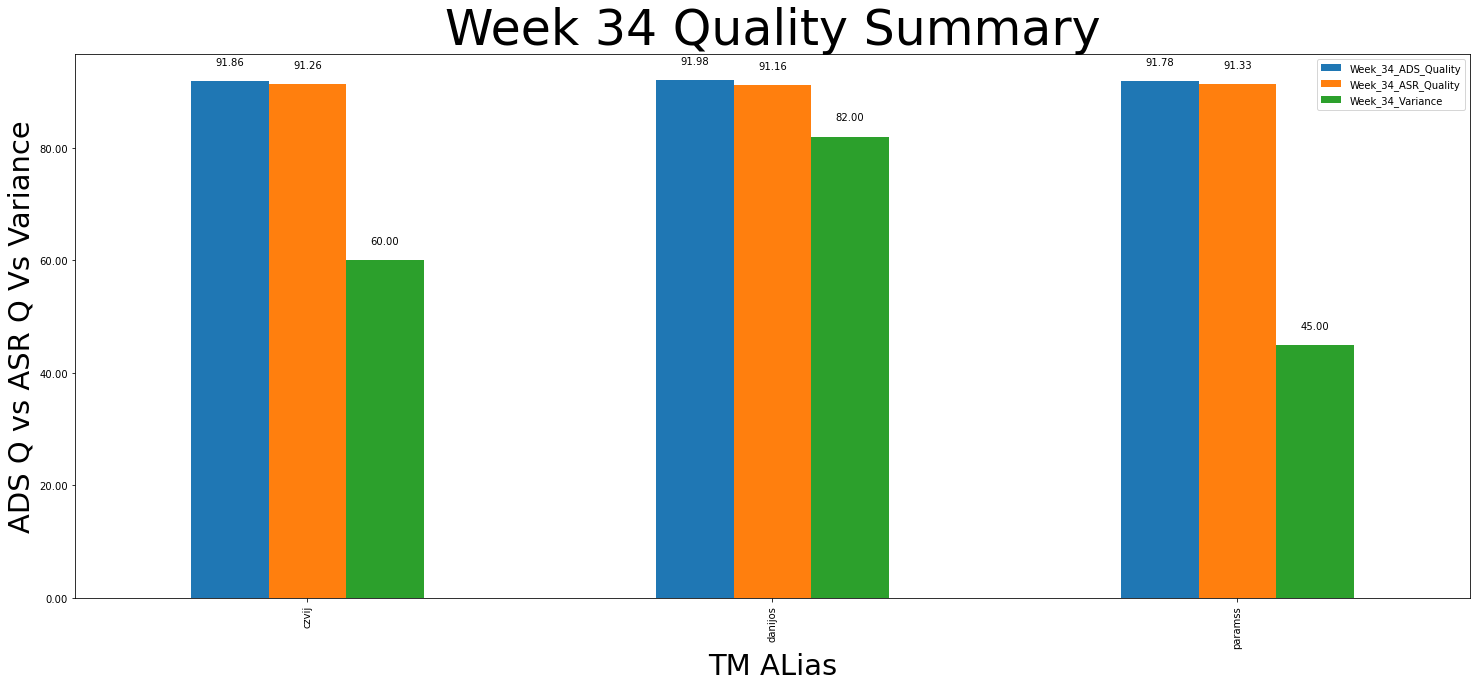

In [22]:
## grpahical view

sss=df_tm_quality_sql.plot(x="tm", y=["Week_34_ADS_Quality", "Week_34_ASR_Quality", "Week_34_Variance"], kind="bar",figsize=(25,10))
sss.set_xlabel('TM ALias',fontsize=29)
sss.set_ylabel('ADS Q vs ASR Q Vs Variance',fontsize=29)
sss.set_title(f'Week {w3} Quality Summary',fontsize=49)
sss.yaxis.set_major_formatter("{x:.2f}")

for p in sss.patches:
    sss.annotate(format(p.get_height(), '.2f'),
                   (p.get_x()+ p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 19), 
                   textcoords = 'offset points')


In [23]:
## save grpah
fig = sss.get_figure()
fig.savefig(r'C:\Users\arvinmvn\Downloads\Quality Picture.png')

In [24]:
import win32com.client as win32
outlook = win32.Dispatch('outlook.application')

def color_red(val):
  if val >= 200:
    color = 'green'
  elif val > 150 and val <200:
    color = 'yellow'
  elif val < 150:
    color = 'red'
  else:
    color = 'black'  
  return 'color: %s' % color 
    

mail = outlook.CreateItem(0)

mail.Subject = 'Test Report'
mail.To='arvinmvn@amazon.com'
   
        
    
## i-> position of data in dataframe
mail.HTMLBody ='''<h2>Hi All <h2>''' + f'''<h3>PFB automated “ADS Vs ASR Quality report” from Week {w1} to {w3}. PFB shared folder for data on the same ''' + '''Go to  <a href='https://share.amazon.com/sites/en_US%20Trans%20Team/Shared%20Documents/Pulse%20RAW%20data'>Pulse RAW Data</a> ''' +'''<h4>Goal:-</h4>''' +'''<h4>If Variance between ADS vs ASR is,</h4>''' +'''<h4>Greater than > 200bps=Green</h4>''' +'''<h4>Between 150-200=YELLOW</h4>''' + '''<h4>Less than=Red</h4> ''' +'''<h4>How to calculate?</h4>''' +'''<h4>ADS Quality =1-(ADS vs Gold overturns/ADS vs Gold Tokens)</h4>''' + '''<h4>ASR Quality =1-(ASR vs Gold overturns/ASR vs Gold Tokens)</h4>''' + '''<h4>Variance=((ADS quality*100)-(ASR quality*100))*100</h4>'''+'''<h3> Table1:- Level 5 Quality ''' + ''' 


                   {}'''.format(df_om_quality_sql.style.hide_index().set_table_styles(
[{'selector': 'th',
  'props': [('background', '#F5F5F5'), 
            ('color', 'black'),
            ('font-family', 'verdana'),
            ('border-style','double'),
            ('border-width','thin'),
           ('font-weight', 'bold'),
           ('text-align','center')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
           ('border-style','double'),
            ('border-width','thin'),
           ('text-align','center'),
           ('text-align','center')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}

]).set_properties(**{'border': '1.3px solid black',
                          'color': 'black'}).applymap(color_red,subset=[f'Week_{w1}_Variance',f'Week_{w2}_Variance',f'Week_{w3}_Variance']).set_precision(2).render()) + '''<h3>Table 2:- TM Quality Table </h3> ''' + ''' {}'''.format(df_tm_quality_sql.style.hide_index().set_table_styles(
[{'selector': 'th',
  'props': [('background', '#F5F5F5'), 
            ('color', 'black'),
            ('font-family', 'verdana'),
            ('border-style','double'),
            ('border-width','thin'),
           ('font-weight', 'bold'),
           ('text-align','center')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
           ('border-style','double'),
            ('border-width','thin'),
           ('text-align','center'),
           ('text-align','center')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}

]).set_properties(**{'border': '1.3px solid black',
                          'color': 'black'}).applymap(color_red,subset=[f'Week_{w1}_Variance',f'Week_{w2}_Variance',f'Week_{w3}_Variance']).set_precision(2).render()) + '''<h3>Table 3:- Customer Wiser Quality Table </h3> ''' + ''' {}'''.format(df_cust_quality_sql.style.hide_index().set_table_styles(
[{'selector': 'th',
  'props': [('background', '#F5F5F5'), 
            ('color', 'black'),
            ('font-family', 'verdana'),
            ('border-style','double'),
            ('border-width','thin'),
           ('font-weight', 'bold'),
           ('text-align','center')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
           ('border-style','double'),
            ('border-width','thin'),
           ('text-align','center'),
           ('text-align','center')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}

]).set_properties(**{'border': '1.3px solid black',
                          'color': 'black'}).applymap(color_red,subset=[f'Week_{w1}_Variance',f'Week_{w2}_Variance',f'Week_{w3}_Variance']).set_precision(2).render()) + '''<h3>Table 4:- TM and DA Quality Table </h3> ''' + '''<h4>Team Paramss </h4> ''' + ''' {}'''.format(df_team_paramss_quality_sql.style.hide_index().set_table_styles(
[{'selector': 'th',
  'props': [('background', '#F5F5F5'), 
            ('color', 'black'),
            ('font-family', 'verdana'),
            ('border-style','double'),
            ('border-width','thin'),
           ('font-weight', 'bold'),
           ('text-align','center')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
           ('border-style','double'),
            ('border-width','thin'),
           ('text-align','center'),
           ('text-align','center')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}

]).set_properties(**{'border': '1.3px solid black',
                          'color': 'black'}).applymap(color_red,subset=[f'Week_{w1}_Variance',f'Week_{w2}_Variance',f'Week_{w3}_Variance']).set_precision(2).render()) + '''<h4>Team Danijos </h4> ''' + ''' {}'''.format(df_team_danijos_quality_sql.style.hide_index().set_table_styles(
[{'selector': 'th',
  'props': [('background', '#F5F5F5'), 
            ('color', 'black'),
            ('font-family', 'verdana'),
            ('border-style','double'),
            ('border-width','thin'),
           ('font-weight', 'bold'),
           ('text-align','center')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
           ('border-style','double'),
            ('border-width','thin'),
           ('text-align','center'),
           ('text-align','center')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}

]).set_properties(**{'border': '1.3px solid black',
                          'color': 'black'}).applymap(color_red,subset=[f'Week_{w1}_Variance',f'Week_{w2}_Variance',f'Week_{w3}_Variance']).set_precision(2).render())+'''<h4>Team czvij </h4> ''' + ''' {}'''.format(df_team_czvij_quality_sql.style.hide_index().set_table_styles(
[{'selector': 'th',
  'props': [('background', '#F5F5F5'), 
            ('color', 'black'),
            ('font-family', 'verdana'),
            ('border-style','double'),
            ('border-width','thin'),
           ('font-weight', 'bold'),
           ('text-align','center')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
           ('border-style','double'),
            ('border-width','thin'),
           ('text-align','center'),
           ('text-align','center')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}

]).set_properties(**{'border': '1.3px solid black',
                          'color': 'black'}).applymap(color_red,subset=[f'Week_{w1}_Variance',f'Week_{w2}_Variance',f'Week_{w3}_Variance']).set_precision(2).render()) + '''<h4>Thanks and Regards</h4> ''' + '''<h4>-Arvinth M.V.N'''


    
    ## : i + 1 increment 1 of index 
# To attach a file to the email (optional):
attachment  = r'C:\Users\arvinmvn\Downloads\Quality Picture.png'
mail.Attachments.Add(attachment)

mail.Send()